## Data preperation

### Download and read data

In [ ]:
Class2SDG = {
    1: 'NO POVERTY',
    2: 'ZERO HUNGER',
    3: 'GOOD HEALTH AND WELL-BEING',
    4: 'QUALITY EDUCATION',
    5: 'GENDER EQUALITY',
    6: 'CLEAN WATER AND SANITATION',
    7: 'AFFORDABLE AND CLEAN ENERGY',
    8: 'DECENT WORK AND ECONOMIC GROWTH',
    9: 'INDUSTRY, INNOVATION, AND INFRASTRUCTURE',
    10: 'REDUCED INEQUALITIES',
    11: 'SUSTAINABLE CITIES AND COMMUNITIES',
    12: 'RESPONSIBLE CONSUMPTION AND PRODUCTION',
    13: 'CLIMATE ACTION',
    14: 'LIFE BELOW WATER',
    15: 'LIFE ON LAND',
    16: 'PEACE, JUSTICE AND STRONG INSTITUTIONS',
    17: 'PARTNERSHIPS',
}

In [ ]:
import gdown

# Download training file
#train_file = 'https://drive.google.com/file/d/1RMDE3TAvbSen1XX4hV8dY0uisQsmHdRs/view?usp=sharing'
!gdown 1RMDE3TAvbSen1XX4hV8dY0uisQsmHdRs

# Download testing file
#test_file = 'https://drive.google.com/file/d/1fPSpj-mhiS4LFofOI-goLRdCzuA-HhmT/view?usp=sharing'
!gdown 1fPSpj-mhiS4LFofOI-goLRdCzuA-HhmT

Downloading...
From: https://drive.google.com/uc?id=1RMDE3TAvbSen1XX4hV8dY0uisQsmHdRs
To: /content/Train_data.csv
100% 482k/482k [00:00<00:00, 80.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fPSpj-mhiS4LFofOI-goLRdCzuA-HhmT
To: /content/Test_data.csv
100% 180k/180k [00:00<00:00, 54.1MB/s]


In [ ]:
import pandas as pd

train_file_path = '/content/Train_data.csv'
test_file_path  = '/content/Test_data.csv'

train_df = pd.read_csv(train_file_path)[['text','SDG']]
test_df = pd.read_csv(test_file_path)[['text','SDG']]

In [ ]:
train_df

text  SDG
0     Furthermore, the need to “Protect, restore and...   15
1     Implementing sustainable development goal 11 i...   11
2     which aims to “develop and implement tools to ...    8
3     It was acknowledged that fundamental changes i...   12
4     Furthermore, it provided guidelines for natura...   11
...                                                 ...  ...
1659  Amongst numerous commitments, the Conference c...    8
1660  Proportion of fish stocks within biologically ...   14
1661  In paragraph 23, Member States renewed the com...   12
1662  Chapter 21 was considered by the Commission on...   12
1663  Hunger is on the rise again globally and under...    2

[1664 rows x 2 columns]

### Data cleaning

In [ ]:
import re
import string
import spacy
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def df_cleaning(df):
  # no capital letters
  df['cleaned']=df['text'].apply(lambda x: x.lower())

  '''df['cleaned']=df['cleaned'].apply(lambda x: x.replace('sdg ','sdg_').replace('climate change','climate_change')
  .replace('1','one').replace('2','two').replace('3','three').replace('4','four').replace('5','five').replace('6','six')
  .replace('7','seven').replace('8','eight').replace('9','nine').replace('10','ten').replace('11','eleven').replace('12','twelve')
  .replace('13','thirteen').replace('14','fourteen').replace('15','fifteen').replace('16','sixteen').replace('17','seventeen')
                                    )'''
  # remove punctuations and numbers
  df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s0-9]' % re.escape(string.punctuation), '', x))

  # Loading model
  nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

  # Lemmatization with stopwords removal
  df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

  # Stem and remove numbers
  df['stemmed']=df['lemmatized'].apply(lambda x: ' '.join([porter.stem(token) for token in x.split() if not token.isnumeric() ]))
  return df

In [ ]:
train_df = df_cleaning(train_df)
test_df = df_cleaning(test_df)

train_df

text  SDG  \
0     Furthermore, the need to “Protect, restore and...   15   
1     Implementing sustainable development goal 11 i...   11   
2     which aims to “develop and implement tools to ...    8   
3     It was acknowledged that fundamental changes i...   12   
4     Furthermore, it provided guidelines for natura...   11   
...                                                 ...  ...   
1659  Amongst numerous commitments, the Conference c...    8   
1660  Proportion of fish stocks within biologically ...   14   
1661  In paragraph 23, Member States renewed the com...   12   
1662  Chapter 21 was considered by the Commission on...   12   
1663  Hunger is on the rise again globally and under...    2   

                                                cleaned  \
0     furthermore the need to “protect restore and p...   
1     implementing sustainable development goal  in ...   
2     which aims to “develop and implement tools to ...   
3     it was acknowledged that fundamental changes i...   
4     furthermore it provided guidelines for natural...   
...                                                 ...   
1659  amongst numerous commitments the conference ca...   
1660  proportion of fish stocks within biologically ...   
1661  in paragraph  member states renewed the commit...   
1662  chapter  was considered by the commission on s...   
1663  hunger is on the rise again globally and under...   

                                             lemmatized  \
0     furthermore need " protect restore promote sus...   
1     implement sustainable development goal   afric...   
2     aim " develop implement tool monitor sustainab...   
3     acknowledge fundamental change way society pro...   
4     furthermore provide guideline natural disaster...   
...                                                 ...   
1659  numerous commitment conference call government...   
1660  proportion fish stock biologically sustainable...   
1661  paragraph   member state renew commitment adva...   
1662  chapter   consider commission sustainable deve...   
1663  hunger rise globally undernutrition continue a...   

                                                stemmed  
0     furthermor need " protect restor promot sustai...  
1     implement sustain develop goal africa includ m...  
2     aim " develop implement tool monitor sustain d...  
3     acknowledg fundament chang way societi produc ...  
4     furthermor provid guidelin natur disast preven...  
...                                                 ...  
1659  numer commit confer call govern develop nation...  
1660            proport fish stock biolog sustain level  
1661  paragraph member state renew commit advanc age...  
1662  chapter consid commiss sustain develop second ...  
1663  hunger rise global undernutrit continu affect ...  

[1664 rows x 5 columns]

### Data splitting

In [ ]:
import numpy as np

#condition = (train_df['SDG']!=17) & (train_df['SDG']!=16)
train_corpus =list(train_df['stemmed'])#[condition])#lemmatized
Y_train = train_df['SDG']#[condition]
Y_train_arr = np.array(Y_train)
Y_train_arr.shape

(1664,)

In [ ]:
#condition2 = (test_df['SDG']!=17) & (test_df['SDG']!=16)

test_corpus =list(test_df['stemmed'])#[condition2])#lemmatized
Y_test = test_df['SDG']#[condition2]
Y_test_arr = np.array(Y_test)

### Exploratory data analysis

#### Average number of tokens per class

In [ ]:
import numpy as np

train_df['text length'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['lemma length'] = train_df['lemmatized'].apply(lambda x: len(x.split()))
train_df['stem length'] = train_df['stemmed'].apply(lambda x: len(x.split()))

train_df_grouped_len= train_df[['SDG','text length','lemma length','stem length']].groupby(by='SDG').agg([np.average, np.std, np.max,np.min]).round(1)

train_df_grouped_len

text length                 lemma length                 stem length  \
        average   std amax amin      average   std amax amin     average   
SDG                                                                        
1          39.9  39.2  195    9         21.2  21.3  107    5        21.2   
2          37.7  42.1  267    4         21.8  25.0  162    2        21.8   
3          33.2  26.5  178    6         17.6  14.9  108    3        17.6   
4          46.9  55.1  279    3         26.9  36.4  227    2        26.9   
5          42.1  44.1  268    6         22.4  23.4  139    4        22.4   
6          33.5  34.8  191    8         18.9  19.7  108    5        18.9   
7          51.4  56.2  251    7         30.2  35.7  146    4        30.2   
8          37.0  43.2  294    7         20.9  24.1  177    3        20.9   
9          34.1  36.1  202    6         18.8  19.1  105    4        18.8   
10         55.1  62.0  281    8         31.9  35.8  173    5        31.9   
11         45.6  54.5  308    7         26.0  31.2  191    5        26.0   
12         36.8  35.0  262    5         20.7  20.5  155    3        20.7   
13         47.7  42.9  212   10         27.4  24.9  125    5        27.4   
14         39.6  42.3  269    8         22.3  23.3  148    4        22.3   
15         37.6  29.9  276    9         21.0  18.2  179    4        21.0   
16         33.7  34.7  242    7         18.6  19.9  135    4        18.6   
17         35.4  27.7  207    6         20.4  16.8  126    2        20.4   

                     
      std amax amin  
SDG                  
1    21.3  107    5  
2    25.0  162    2  
3    14.9  108    3  
4    36.4  227    2  
5    23.4  139    4  
6    19.7  108    5  
7    35.7  146    4  
8    24.1  177    3  
9    19.1  105    4  
10   35.8  173    5  
11   31.2  191    5  
12   20.5  155    3  
13   24.9  125    5  
14   23.3  148    4  
15   18.2  179    4  
16   19.9  135    4  
17   16.8  126    2

#### Class distributions


In [ ]:
len(train_df[['text']])

1664

In [ ]:
len(test_df[['text']])

555

In [ ]:
train_df[['SDG']].value_counts()

SDG
17     199
15     140
8      118
16     114
3      111
11     108
2      106
12      95
4       94
1       91
13      90
5       82
6       77
10      65
9       62
14      59
7       53
dtype: int64

In [ ]:
test_df[['SDG']].value_counts()

SDG
17     67
15     47
8      39
16     38
3      37
11     36
2      36
4      32
12     32
13     30
1      30
5      27
6      25
10     21
9      21
14     20
7      17
dtype: int64

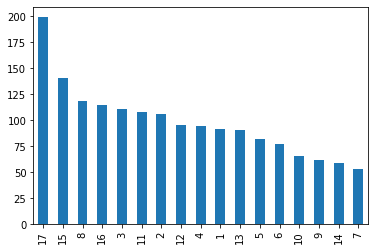

In [ ]:
pd.value_counts(train_df['SDG']).plot.bar()

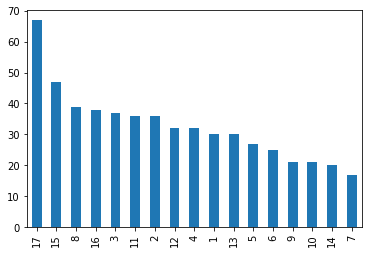

In [ ]:
pd.value_counts(test_df['SDG']).plot.bar()

#### Word cloud

In [ ]:
# Importing wordcloud for plotting word clouds
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from textwrap import wrap

import matplotlib.pyplot as plt

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(5,4))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title(Class2SDG[title] )
  plt.show()

def generate_wordcloud_from_grouped_df(df_grouped):
  # Creating Document Term Matrix
  cv=CountVectorizer(analyzer='word')
  data=cv.fit_transform(df_grouped['lemmatized'])
  df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
  df_dtm.index=df_grouped.index

  # Transposing document term matrix
  df_dtm=df_dtm.transpose()

  # Plotting word cloud for each product
  for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

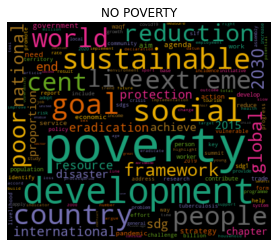

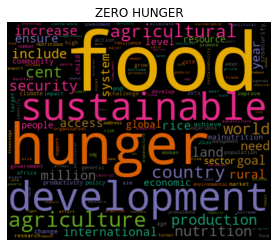

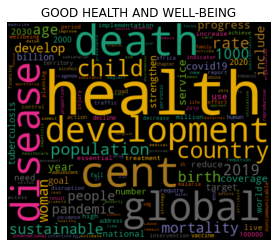

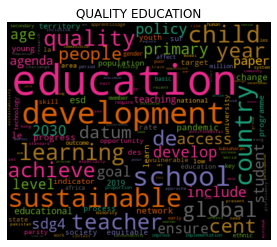

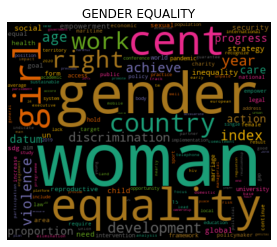

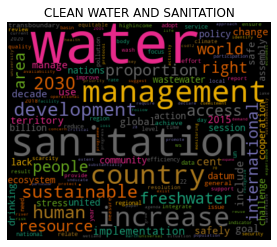

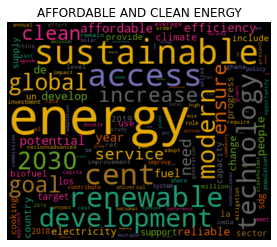

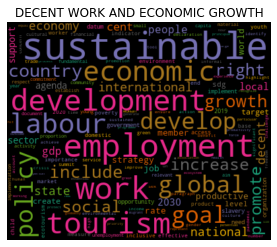

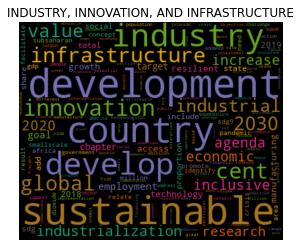

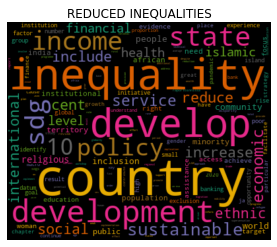

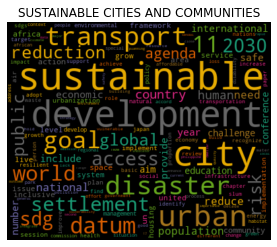

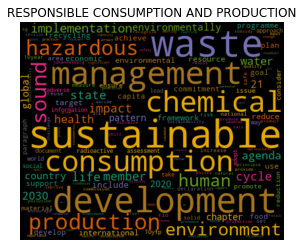

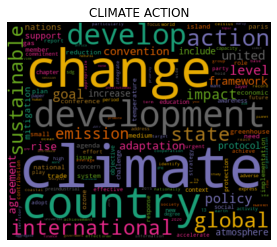

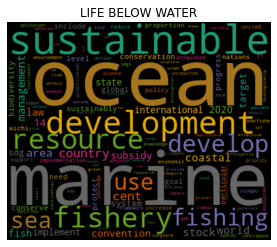

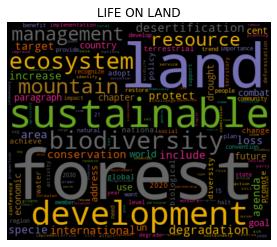

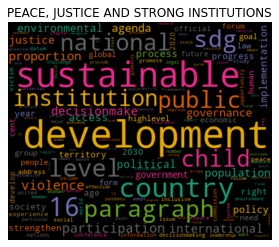

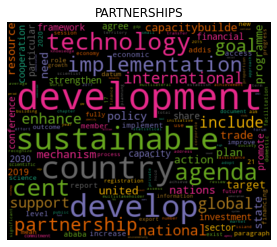

In [ ]:
# Word clouds of training data

train_df_grouped=train_df[['SDG','lemmatized']].groupby(by='SDG').agg(lambda x:' '.join(x))
generate_wordcloud_from_grouped_df(train_df_grouped)

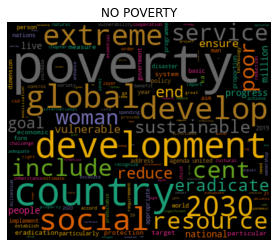

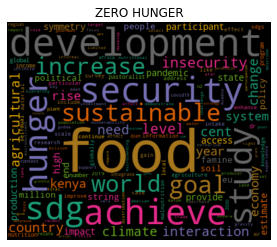

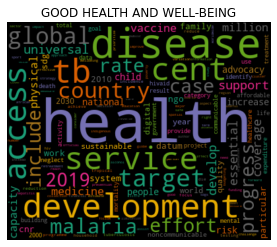

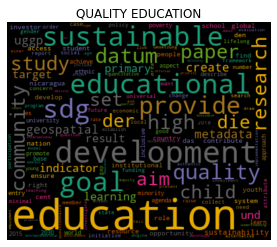

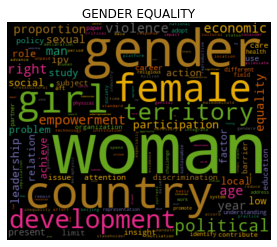

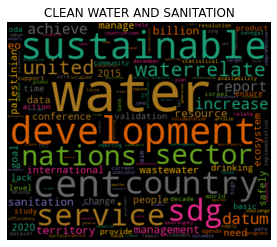

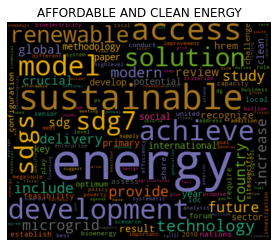

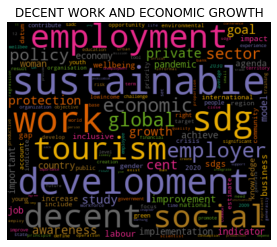

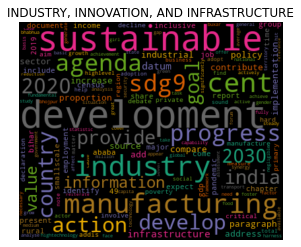

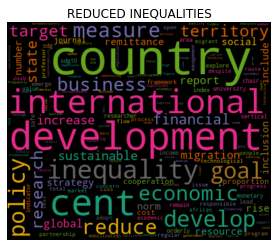

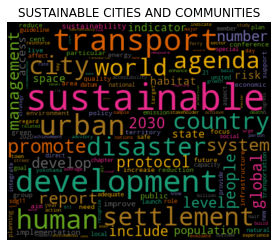

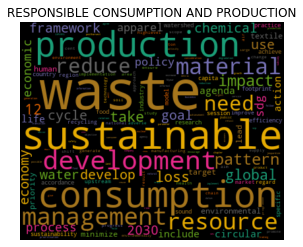

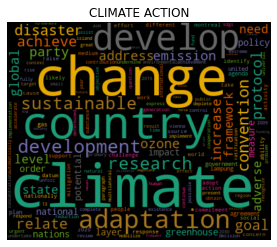

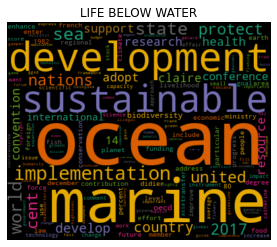

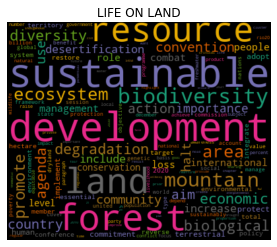

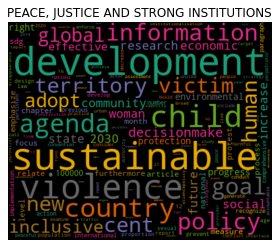

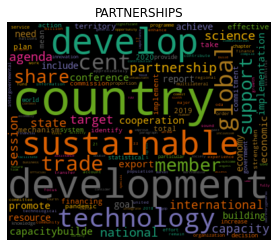

In [ ]:
# Word clouds of testing data

test_df_grouped=test_df[['SDG','lemmatized']].groupby(by='SDG').agg(lambda x:' '.join(x))
generate_wordcloud_from_grouped_df(test_df_grouped)

#### LDA topic modeling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.2, min_df=4/1664)#, max_features=5000
tf = tf_vectorizer.fit_transform(train_df['stemmed'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()

len(tf_feature_names)

1294

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

lda_model = LatentDirichletAllocation(n_components=17, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 50
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
water wast manag countri africa sanit human chemic number emiss subsaharan substanti reduc hazard pollut asia includ birth territori level america cent death high datum air lack period minim nearli global advers carbon northern region recycl registr grow lead prevent note new reach focu capita southern wide central rang qualiti
Topic 1:
climat educ chang sdg action impact indic mitig adapt paper case polit understand analysi datum differ accord issu system qualiti effect context challeng focu univers primari engag particip govern factor respons earli model framework build key result inclus solut initi explor stakehold commun awar new academ goal learn vulner link
Topic 2:
energi access increas cent world peopl million servic health year global afford safe school popul effici renew water ensur remain modern pandem expect affect young worldwid child basic despit annual estim essenti provid past progress sourc experi fall clean improv averag addit reliabl advanc effort skill elec

In [ ]:
!pip install pyldavis

In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
10      2.972113  -13.786730       1        1  23.156358
14     -7.288966   86.150291       2        1  12.119054
1      38.049393   65.587624       3        1   7.499866
12    -42.227043    6.162611       4        1   7.017855
8     -63.238548  -41.294518       5        1   6.859491
13    -48.099060   56.473579       6        1   5.998800
2     -48.087841  120.044159       7        1   5.826568
0      17.708776  131.640900       8        1   5.374488
6      92.846191   -8.328438       9        1   4.595058
5      47.892864  -45.589878      10        1   4.022400
4      92.039185   50.145565      11        1   3.586965
7     -94.766495   15.104293      12        1   3.473156
16     -9.109381  -64.732552      13        1   3.330744
11    -94.606842   77.712318      14        1   2.928118
9      44.945538   14.845922      15        1   2.273912
3      -1.493484   35.842178      16        1   1.116010
15     71.312836  105.574364      17        1   0.821157, topic_info=              Term        Freq       Total Category  logprob  loglift
144           cent  254.000000  254.000000  Default   30.000  30.0000
239        countri  425.000000  425.000000  Default   29.000  29.0000
350         econom  152.000000  152.000000  Default   28.000  28.0000
1279         woman  147.000000  147.000000  Default   27.000  27.0000
871        poverti  115.000000  115.000000  Default   26.000  26.0000
...            ...         ...         ...      ...      ...      ...
1292         youth    0.059598   20.064095  Topic17   -8.364  -1.0169
1287        worsen    0.059598    4.808297  Topic17   -8.364   0.4117
450          fight    0.059598    4.757894  Topic17   -8.364   0.4223
833   particularli    0.059598   26.878457  Topic17   -8.364  -1.3093
1158          task    0.059598    6.795437  Topic17   -8.364   0.0658

[904 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         2  0.932881     ababa
3         4  0.916121      abus
4         3  0.951355    academ
5         3  0.855110  academia
7         1  0.179126    access
...     ...       ...       ...
1291      7  0.700446     young
1292      3  0.249201     youth
1292     13  0.598083     youth
1292     14  0.099681     youth
1293      5  0.867781      zero

[1567 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 15, 2, 13, 9, 14, 3, 1, 7, 6, 5, 8, 17, 12, 10, 4, 16])

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=True,use_idf=True, stop_words="english", analyzer='word', 
                             ngram_range=(1, 1), max_df=0.1, min_df=4/1664)

X_train_tfidf = vectorizer.fit_transform(train_corpus)
X_test_tfidf = vectorizer.transform(test_corpus)
print(X_train_tfidf.shape)

(1664, 1269)


In [ ]:
dense = X_train_tfidf.todense()
denselist = dense.tolist()

feature_names = vectorizer.get_feature_names()
#feature_names
df_tfidf = pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_tfidf.iloc[4]

ababa     0.0
abil      0.0
abl       0.0
abus      0.0
academ    0.0
         ... 
write     0.0
year      0.0
young     0.0
youth     0.0
zero      0.0
Name: 4, Length: 1354, dtype: float64

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score#, auc, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def eval_classifier(Y_true,Y_pred, pred ):
  n_classes = np.max(Y_true)
  acc = accuracy_score(Y_true, Y_pred)
  print('accuracy :',100*acc.round(3))

  precision = precision_score(Y_true, Y_pred, average='weighted')#micro, macro, weighted
  print('precision:',100*precision.round(3))

  recall = recall_score(Y_true, Y_pred, average='macro')#micro, macro, weighted
  print('recall   :',100*recall.round(3))

  roc_auc = roc_auc_score(Y_true, pred, multi_class='ovo') #'raise', 'ovr', 'ovo'
  print('roc_auc  :',100*roc_auc.round(3))

  fig, ax = plt.subplots(figsize=(10, 5))
  ConfusionMatrixDisplay.from_predictions(Y_true, Y_pred, ax=ax)
  ax.xaxis.set_ticklabels(np.arange(1,n_classes+1))
  ax.yaxis.set_ticklabels(np.arange(1,n_classes+1))
  _ = ax.set_title(
      f"Confusion Matrix for {clf.__class__.__name__}"
  )

## Naive Bays model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf,Y_train_arr)

-------Training set---------
accuracy : 78.7
precision: 85.7
recall   : 73.5
roc_auc  : 99.4


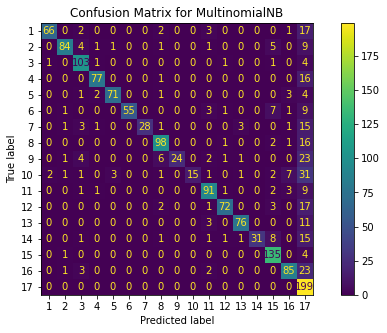

In [ ]:
train_pred = clf.predict_proba(X_train_tfidf)
Y_train_pred = clf.predict(X_train_tfidf)

print('-------Training set---------')
eval_classifier(Y_train_arr,Y_train_pred, train_pred )

-------Test set---------
accuracy : 62.3
precision: 78.60000000000001
recall   : 56.39999999999999
roc_auc  : 94.1


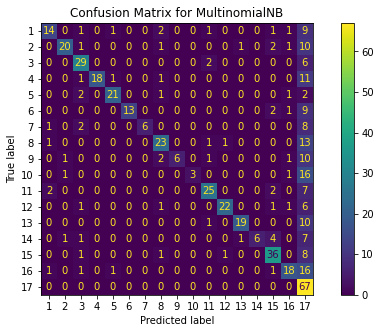

In [ ]:
pred_test = clf.predict_proba(X_test_tfidf)
Y_test_pred = clf.predict(X_test_tfidf)

print('-------Test set---------')
eval_classifier(Y_test_arr,Y_test_pred, pred_test )

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(fit_prior=False).fit(X_train_tfidf,Y_train_arr)

-------Test set---------
accuracy : 71.2
precision: 73.5
recall   : 69.69999999999999
roc_auc  : 94.8


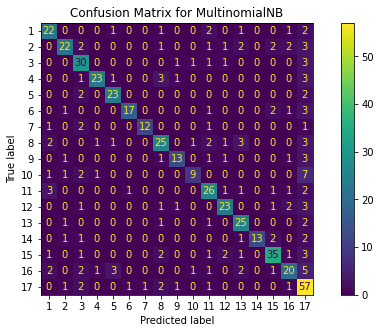

In [ ]:
pred_test = clf.predict_proba(X_test_tfidf)
Y_test_pred = clf.predict(X_test_tfidf)

print('-------Test set---------')
eval_classifier(Y_test_arr,Y_test_pred, pred_test )

-------Test set---------
accuracy : 71.7
precision: 73.9
recall   : 70.1
roc_auc  : 94.89999999999999


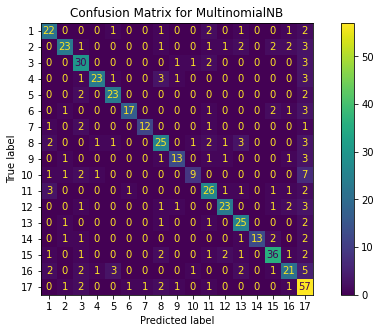

In [ ]:
clf = MultinomialNB(alpha=0.9,fit_prior=False).fit(X_train_tfidf,Y_train_arr)

pred_test = clf.predict_proba(X_test_tfidf)
Y_test_pred = clf.predict(X_test_tfidf)

print('-------Test set---------')
eval_classifier(Y_test_arr,Y_test_pred, pred_test )

## Ramdom Forests

-------Test set---------
accuracy : 72.1
precision: 73.9
recall   : 70.7
roc_auc  : 94.39999999999999


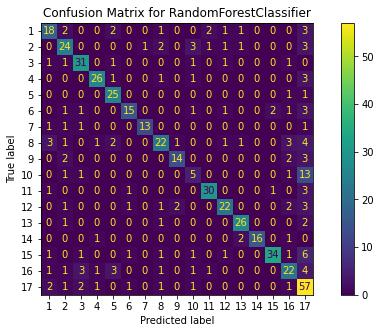

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# No balancing, n_estimators=100

clf = RandomForestClassifier(n_estimators=100).fit(X_train_tfidf,Y_train_arr)

pred_test = clf.predict_proba(X_test_tfidf)
Y_test_pred = clf.predict(X_test_tfidf)

print('-------Test set---------')
eval_classifier(Y_test_arr,Y_test_pred, pred_test )

-------Test set---------
accuracy : 70.8
precision: 73.7
recall   : 69.69999999999999
roc_auc  : 93.89999999999999


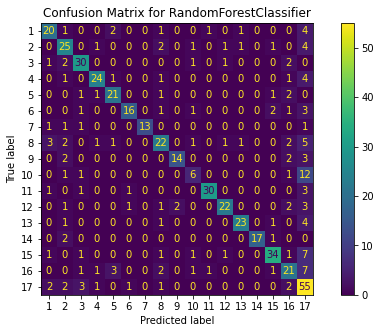

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# No balancing, n_estimators=50
clf = RandomForestClassifier(n_estimators=50).fit(X_train_tfidf,Y_train_arr)

pred_test = clf.predict_proba(X_test_tfidf)
Y_test_pred = clf.predict(X_test_tfidf)

print('-------Test set---------')
eval_classifier(Y_test_arr,Y_test_pred, pred_test )

-------Test set---------
accuracy : 70.6
precision: 74.2
recall   : 69.19999999999999
roc_auc  : 94.89999999999999


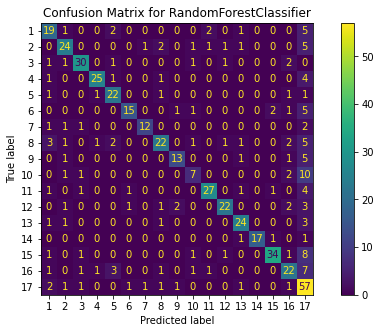

In [ ]:
# with balancing
clf = RandomForestClassifier(n_estimators=100,class_weight="balanced").fit(X_train_tfidf,Y_train_arr)

pred_test = clf.predict_proba(X_test_tfidf)
Y_test_pred = clf.predict(X_test_tfidf)

print('-------Test set---------')
eval_classifier(Y_test_arr,Y_test_pred, pred_test )

### without class 17

-------Test set---------
accuracy : 74.0
precision: 76.8
recall   : 73.7
roc_auc  : 95.1


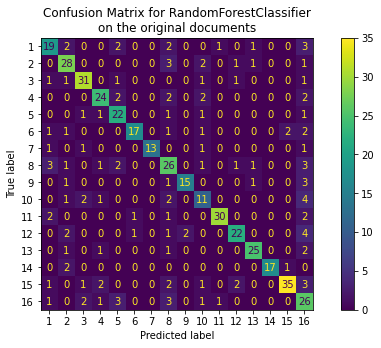

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100).fit(X_train_tfidf,Y_train_arr)

pred_test = clf.predict_proba(X_test_tfidf)
Y_test_pred = clf.predict(X_test_tfidf)

print('-------Test set---------')
eval_classifier(Y_test_arr,Y_test_pred, pred_test )

### without classes 16-17

-------Test set---------
accuracy : 76.0
precision: 77.4
recall   : 76.0
roc_auc  : 95.8


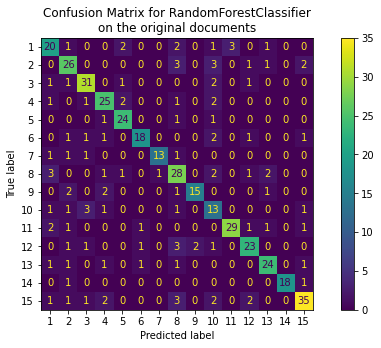

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100).fit(X_train_tfidf,Y_train_arr)

pred_test = clf.predict_proba(X_test_tfidf)
Y_test_pred = clf.predict(X_test_tfidf)

print('-------Test set---------')
eval_classifier(Y_test_arr,Y_test_pred, pred_test )

#fine tuning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

clf = RandomForestClassifier(n_jobs=-1)


param_grid = {
    'min_samples_split': [2, 3, 4,5], 
    'n_estimators' : [100, 150, 200,250],
    'max_depth': [100, 150, 200,250,300],
    'max_features': [5,10, 20, 30,40]
}

scorers = {
    #'precision_score': make_scorer(precision_score),
    #'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [ ]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train_tfidf, Y_train_arr)

    # make the predictions
    y_pred = grid_search.predict(X_test_tfidf)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    return grid_search

In [ ]:
grid_search_clf = grid_search_wrapper(refit_score='accuracy_score')

Best params for accuracy_score
{'max_depth': 200, 'max_features': 5, 'min_samples_split': 3, 'n_estimators': 200}


In [ ]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_accuracy_score', ascending=False)
results[['mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head()

mean_test_accuracy_score param_max_depth param_max_features  \
166                     0.736             200                  5   
326                     0.733             300                  5   
167                     0.733             200                  5   
343                     0.733             300                 10   
332                     0.732             300                  5   

    param_min_samples_split param_n_estimators  
166                       3                200  
326                       3                200  
167                       3                250  
343                       3                250  
332                       5                100

-------Test set---------
accuracy : 74.4
precision: 76.8
recall   : 72.7
roc_auc  : 95.1


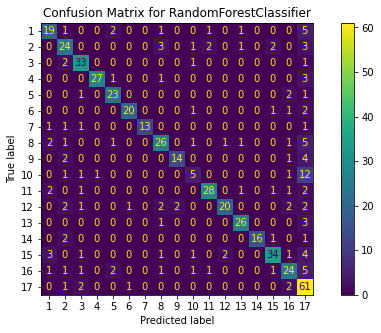

In [ ]:
# with balancing
clf = RandomForestClassifier(max_depth=200, max_features=5, min_samples_split= 3,
    n_estimators=200).fit(X_train_tfidf,Y_train_arr)

pred_test = clf.predict_proba(X_test_tfidf)
Y_test_pred = clf.predict(X_test_tfidf)

print('-------Test set---------')
eval_classifier(Y_test_arr,Y_test_pred, pred_test )

## transient

In [ ]:
class_i = 1
corpus = ' '.join(np.array(train_df[['stemmed']][train_df['SDG']==class_i])[:,0])
#for tokn in corpus.split():